# Imorting Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb


## Loading the data

In [14]:
training_set = pd.read_csv('/Users/admin/Desktop/ML project/Code/Classification/datatraining.txt')
test_set = pd.read_csv('/Users/admin/Desktop/ML project/Code/Classification/datatest.txt')

In [15]:
training_set.head()


,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [16]:
training_set.describe()


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [17]:
training_set.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


# Feature engineering

Text(0.5, 1.0, 'Distribution of Output variable (0/1)')

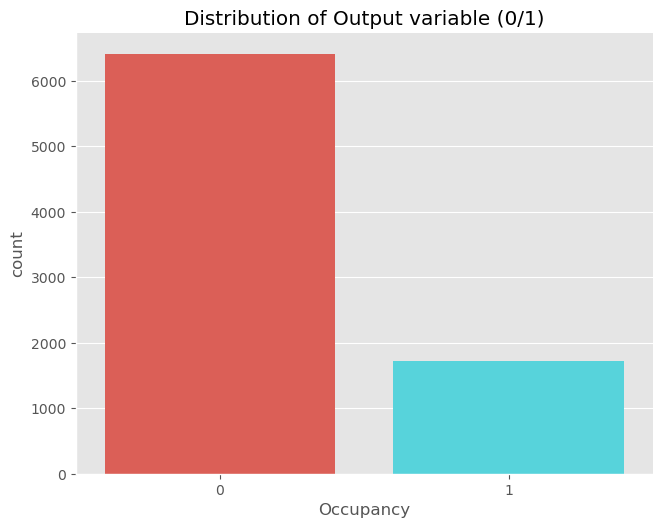

In [23]:
sb.set_palette("hls",2)
sb.FacetGrid(training_set, hue="Occupancy",height=5,aspect = 1.3)
sb.countplot(x="Occupancy", data=training_set, saturation=1).set_title("Distribution of Output variable (0/1)")



In [24]:
training_set['Occupancy'].value_counts()


0    6414
1    1729
Name: Occupancy, dtype: int64

/var/folders/fz/krj_p55n51n96d_v4wx0c7dr0000gn/T/ipykernel_21545/1444700746.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(training_set['Temperature'])


<Axes: xlabel='Temperature', ylabel='Density'>

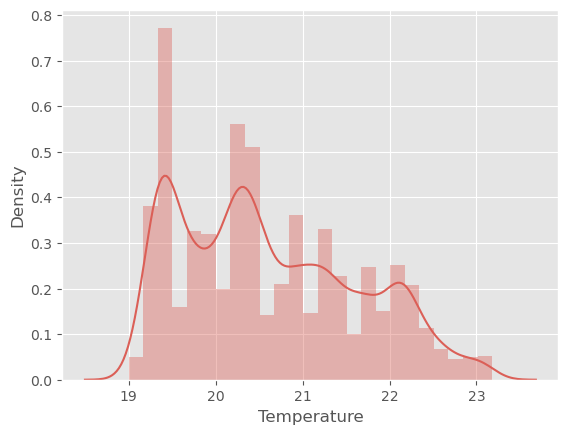

In [25]:
sb.distplot(training_set['Temperature'])


/var/folders/fz/krj_p55n51n96d_v4wx0c7dr0000gn/T/ipykernel_21545/658407870.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(training_set['Humidity'])


<Axes: xlabel='Humidity', ylabel='Density'>

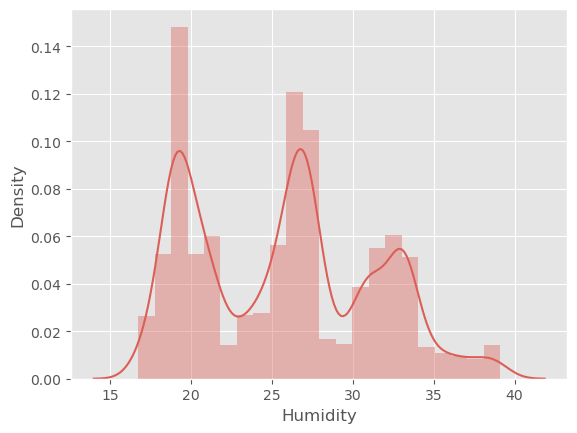

In [26]:
sb.distplot(training_set['Humidity'])


/var/folders/fz/krj_p55n51n96d_v4wx0c7dr0000gn/T/ipykernel_21545/1195982099.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(training_set['Light'])


(-250.0, 1000.0)

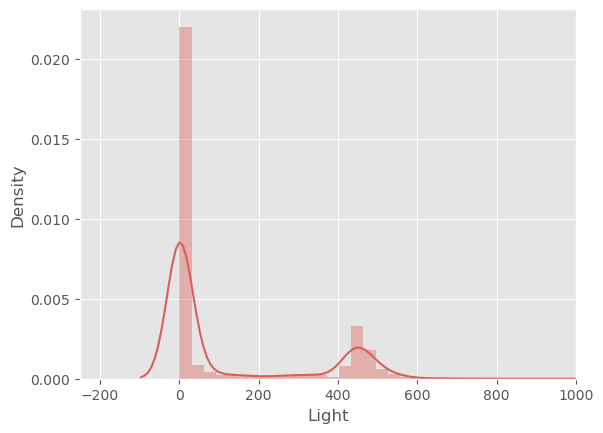

In [27]:
sb.distplot(training_set['Light'])
plt.xlim(-250, 1000)

/var/folders/fz/krj_p55n51n96d_v4wx0c7dr0000gn/T/ipykernel_21545/384448223.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(training_set['CO2'])


<Axes: xlabel='CO2', ylabel='Density'>

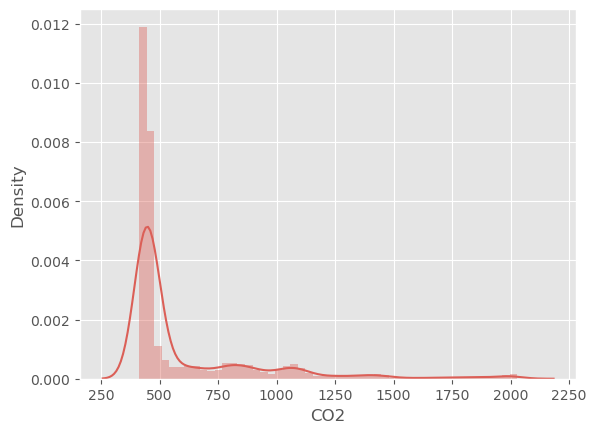

In [28]:
sb.distplot(training_set['CO2'])


/var/folders/fz/krj_p55n51n96d_v4wx0c7dr0000gn/T/ipykernel_21545/1265332265.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(training_set['HumidityRatio'])


<Axes: xlabel='HumidityRatio', ylabel='Density'>

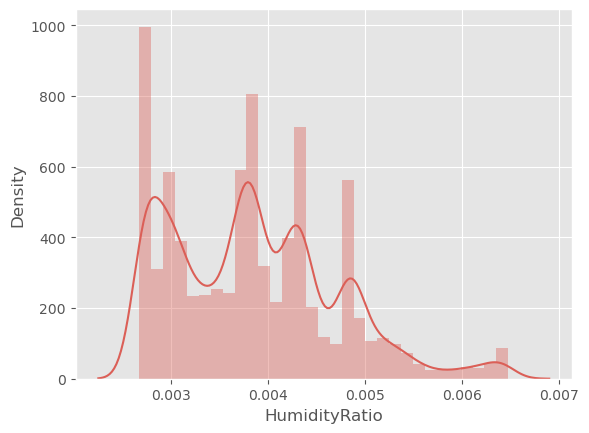

In [29]:
sb.distplot(training_set['HumidityRatio'])


# Visualisation of Feature Variables

/var/folders/fz/krj_p55n51n96d_v4wx0c7dr0000gn/T/ipykernel_21545/213486145.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = training_set.corr()


<Axes: >

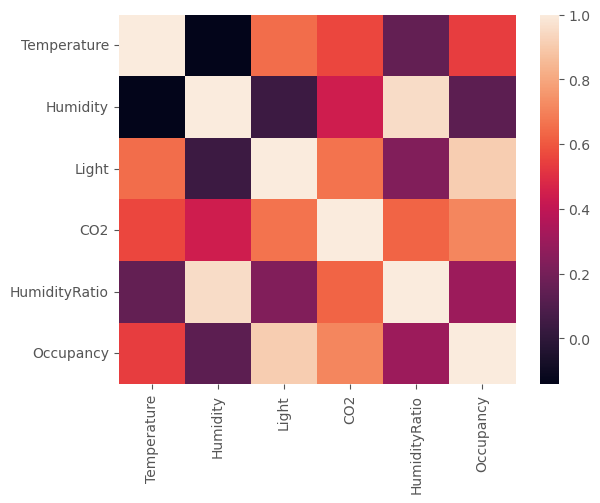

In [30]:
corr = training_set.corr()
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Now we can see ...

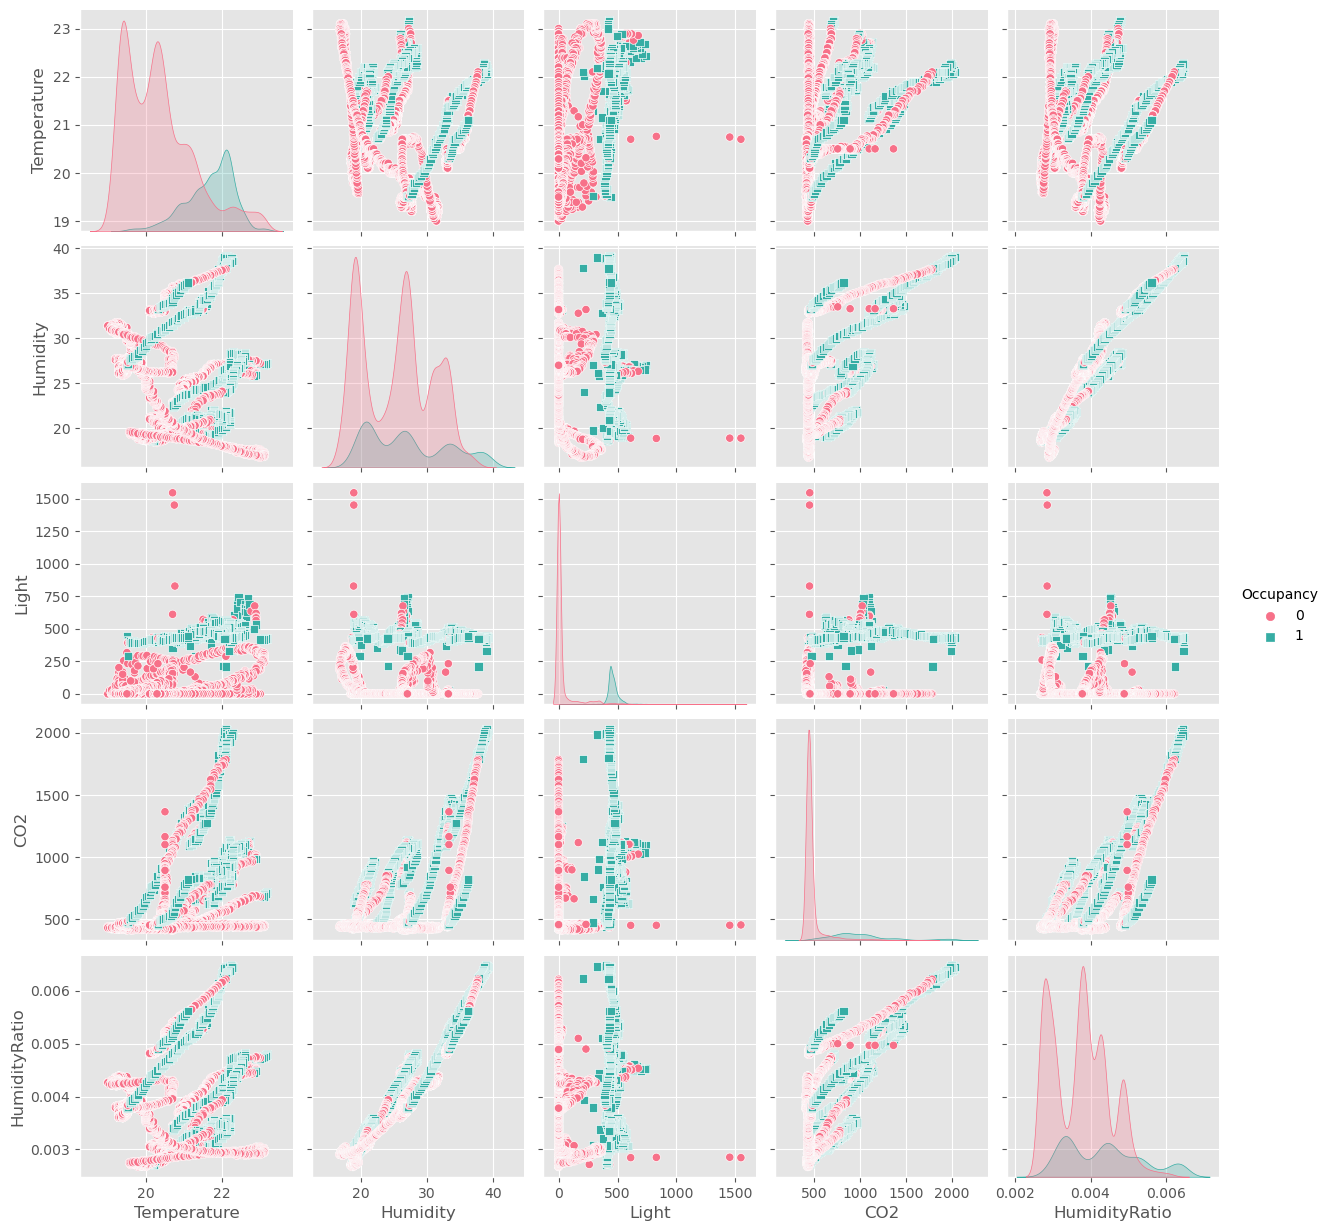

In [31]:
sb.pairplot(training_set, hue='Occupancy',palette="husl",markers=["o", "s"])


# Creating Training and Test set

In [33]:
#training set
X_train = training_set.iloc[:,1:6].values
y_train = training_set.iloc[:,6].values

#test set
X_test = test_set.iloc[:,1:6].values
y_test = test_set.iloc[:,6].values


# Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creating Classification model

## 1. Logistic Regression Classifier

In [35]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,class_weight='balanced')
classifier.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [37]:
# Making the prediction
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_logit = confusion_matrix(y_test, y_pred)
cm_logit

array([[1638,   55],
       [   2,  970]])

## 2. K-Nearest Neighbors Classifier


In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2, weights='uniform')
classifier.fit(X_train, y_train)

# Making the prediction
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred)
cm_knn

array([[1671,   22],
       [ 192,  780]])

## 3. Support Vector Machines (Linear kernel)


In [39]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, class_weight='balanced')
classifier.fit(X_train, y_train)

# Making the prediction
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred)
cm_svm

array([[1638,   55],
       [   2,  970]])

## 3.2 Support Vector Machines (Radial Kernel)


In [52]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0,class_weight='balanced')
classifier.fit(X_train, y_train)

#Making the prediction
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_KSVM = confusion_matrix(y_test, y_pred)
cm_KSVM

array([[1616,   77],
       [   3,  969]])

# 4. Naive Bayes Classifier


In [53]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Making the prediction
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_NB = confusion_matrix(y_test, y_pred)
cm_NB

array([[1638,   55],
       [   5,  967]])

## 5. Decision Tree Classifier


In [54]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,class_weight='balanced')
classifier.fit(X_train, y_train)

# Making the prediction
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dtree = confusion_matrix(y_test, y_pred)
cm_dtree

array([[1643,   50],
       [ 450,  522]])

## 6. Random Forest Classifier


In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 0,class_weight='balanced')
classifier.fit(X_train, y_train)

# Making the prediction
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_RF = confusion_matrix(y_test, y_pred)
cm_RF

array([[1642,   51],
       [  94,  878]])

### Module evaluations by creating Confusion Matrices

In [56]:
cmlist = [cm_logit,cm_knn,cm_svm,cm_KSVM,cm_NB,cm_dtree,cm_RF]


In [57]:
Accuracy = [];Precision = [];Recall =[];F1Score =[]


In [58]:
for i in range(7):
    temp = cmlist[i] 
    Accuracy.append((temp[0,0]+temp[1,1])/2665)
    Precision.append(temp[1,1]/(temp[1,1]+temp[0,1]))
    Recall.append(temp[1,1]/(temp[1,1]+temp[1,0]))
    F1Score.append(2*Precision[i]*Recall[i]/(Precision[i]+Recall[i]))

In [59]:
Algorithm = ['Logistic Regression','KNN ','SVM (Linear)','SVM(Kernel)','Naive Bayes','Decision Tree', 'Random Forests']


In [61]:
data = {
    'Algorithm': Algorithm,
    'Accuracy': Accuracy,
    'Precision': Precision,
    'Recall': Recall,
    'F1 Score': F1Score
}
df = pd.DataFrame(data)


df

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.978612,0.946341,0.997942,0.971457
1,KNN,0.919700,0.972569,0.802469,0.879369
2,SVM (Linear),0.978612,0.946341,0.997942,0.971457
3,SVM(Kernel),0.969981,0.926386,0.996914,0.960357
4,Naive Bayes,0.977486,0.946184,0.994856,0.969910
5,Decision Tree,0.812383,0.912587,0.537037,0.676166
6,Random Forests,0.945591,0.945102,0.903292,0.923724
